In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.widgets import Cursor

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider
from IPython.display import HTML

from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider, Arrow, Label, ArrowHead
from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_notebook
output_notebook()


%matplotlib inline

Loading BokehJS ...

### Exemple d'axes polaires: spirale d'archimède 

In [2]:
def cart2pol(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    print(theta)
    return r, theta

def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y


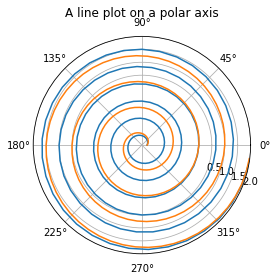

In [3]:
def init():
    ax.set_rmax(2)
    ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
    ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
    ax.grid(True)
    ax.set_title("A line plot on a polar axis", va='bottom')
    return ln,

def update(frame):
    r = frame
    theta = 3*np.pi * frame
    x.append(theta)
    y.append(r)
    ln.set_data(x, y)
    return ln,

x, y = [], []
r = np.arange(-2, 2, 0.02)


theta = 2 * np.pi * r
fig = plt.figure(1)

ax = fig.add_subplot(111, projection='polar')
ln, = plt.polar([], [])

ax.plot(theta, r)
anim = animation.FuncAnimation(fig, update, frames=r,
                    init_func=init, blit=True)

HTML(anim.to_html5_video())


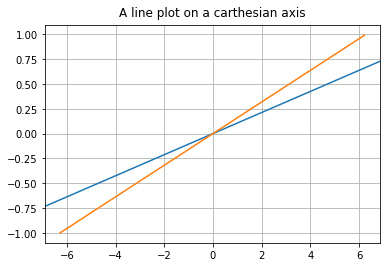

In [4]:
def init():
    ax.grid(True)
    ax.set_title("A line plot on a carthesian axis", va='bottom')
    return ln,

def update(frame):
    x.append(3*np.pi * frame)
    y.append(frame)
    ln.set_data(x, y)
    return ln,

x, y = [], []
r = np.arange(-1, 1, 0.01)
theta = 2 * np.pi * r

a, b = pol2cart(r, theta)

fig = plt.figure(1)

ax = fig.add_subplot(111)
ln, = plt.plot([], [])

ax.plot(theta, r)
anim = animation.FuncAnimation(fig, update, frames=r,
                    init_func=init, blit=True)

HTML(anim.to_html5_video())


### Example of polar coordinates on carthésian axis

* Add x, y sliders
* Add text for theta, (x, y) and r
* Unit vector


In [5]:
n = 500
x = np.linspace(0, 20, n)
y = np.linspace(0, 20, n)
r = np.sqrt(x**2 + y**2)

rot_matrix = np.asarray([[np.cos(0.5*np.pi), -np.sin(0.5*np.pi)], 
                         [np.sin(0.5*np.pi), np.cos(0.5*np.pi)]])

#Unit vectors points for each coordinates
zeros = np.zeros(n).astype(float)
u = np.linspace(0, 5, n)
u_theta = np.dot(np.array([5, 5]).T, rot_matrix)

plot = figure(x_range=(-50, 50), y_range=(-50, 50), plot_width=600, plot_height=600, title="Polar coordinate")

#Main line
line = plot.line(x, y, color="#00ced1", line_width=5,  alpha=0.6, legend="Transformation linéaire")

#Lbels for coordinates
x_text = "x = " + "%.2f" % round(x[-1],2)
y_text = "y = " + "%.2f" % round(y[-1],2)
x_label = Label(x=x[-1], y=0, text=x_text)
y_label = Label(x=0, y=y[-1], text=y_text)


#Unit vectors lines with labels
plot.line(u, zeros, color="#ED192D", line_width=3, alpha=0.5, legend="Vector unité sur l'axe x")
u_x_label = Label(x=u[-1], y=0, text='u_x')

plot.line(zeros, u, color="#ED192D", line_width=3, alpha=0.5, legend="Vector unité sur l'axe y")
u_y_label = Label(x=0, y=u[-1], text='u_y')


u_r_line = plot.line(x[-1]+u, y[-1]+u, color="#008000", line_width=3, alpha=0.5, legend="Vector unité de rho")
u_r_label = Label(x=x[-1]+u[-1], y=y[-1]+u[-1], text='u_r')
u_theta_line = plot.line(x[-1]+np.linspace(0, u_theta[0], n), y[-1]+np.linspace(0, u_theta[1], n) , color="#008000", line_width=3, alpha=0.5, legend="Vector unité de theta")
u_theta_label = Label(x=x[-1]+u_theta[0], y=y[-1]+u_theta[1], text='u_theta')

#Plot properties
plot.xaxis.axis_label = 'x axis'
plot.yaxis.axis_label = 'y axis'
plot.legend.background_fill_alpha = 0.2

#Add layout to the plot
plot.add_layout(x_label)
plot.add_layout(y_label)
plot.add_layout(u_x_label)
plot.add_layout(u_y_label)
plot.add_layout(u_r_label)
plot.add_layout(u_theta_label)



In [6]:
def update_plot(r_slider, theta_slider):
    M_x = r_slider*np.cos(theta_slider)
    M_y = r_slider*np.sin(theta_slider)
    
    u_r = np.array([5* np.cos(theta_slider), 5*np.sin(theta_slider)])
    #Rotate the unit vector for theta
    theta_up = -np.dot(u_r.T, rot_matrix)
    
    line.data_source.data['x'] = np.linspace(0, M_x, n)
    line.data_source.data['y'] = np.linspace(0, M_y, n)
    x_label.x = M_x
    x_label.text = "x = " + "%.2f" % round(M_x,2)
    y_label.y = M_y
    y_label.text = "y = " + "%.2f" % round(M_y,2)

    
    #Unit vectors update
    u_r_line.data_source.data['x'] = np.linspace(0, u_r[0], n) + M_x
    u_r_line.data_source.data['y'] = np.linspace(0, u_r[1], n) + M_y
    
    
    u_theta_line.data_source.data['x'] = np.linspace(0, theta_up[0], n) + M_x
    u_theta_line.data_source.data['y'] =np.linspace(0, theta_up[1], n) + M_y
    
    u_r_label.x = u_r[0] + M_x
    u_r_label.y = u_r[1] + M_y
    u_theta_label.x = theta_up[0] + M_x
    u_theta_label.y = theta_up[1] + M_y
    
    push_notebook()
    return

In [7]:
show(plot, notebook_handle=True)
interact(update_plot, \
         r_slider = FloatSlider(min=0.0, max=r[-1] + 5, step=0.5, value=20, description='rho :'), \
         theta_slider = FloatSlider(min=0.0, max=2*np.pi + 0.05, step=0.05, value=0.5, description='theta :'));

interactive(children=(FloatSlider(value=20.0, description='rho :', max=33.2842712474619, step=0.5), FloatSlide…